# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal: 
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Importing and understanding Data

In [1]:
#Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)


In [2]:
#Read Data
bike=pd.read_csv("day.csv")

In [3]:
# Looking at the first five rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking the shape of the data
bike.shape

(730, 16)

In [5]:
#checking for null values in dataset
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Let's see the statistical information of the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#checking for datatypes of columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Dropping the unwanted columns from the given dataset
bike=bike.drop(['instant','dteday','casual','registered'],axis=1)

In [9]:
# After dropping lets have a look at the first five rows
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Renaming some columns for better understanding
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)

In [11]:
# After Renaming the columns lets have a look at the first five rows
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Encoding the Labels & Visualization

In [12]:
#From data we can see that: season,year,holiday,workingday,month,weekday,weathersit all are categorical variables
#We will replace season,weekday,month and weathersit with appropriate values

In [13]:
bike['season']=bike['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['month']=bike['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike['weathersit'].replace({1:'clear',2:'Mist',3:'Light snow',4:'Heavy rain'})
bike['weekday']=bike['weekday'].replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [14]:
#Checking the datatypes after replacing the categorical columns with appropriate values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [15]:
#Lets see the first five rows
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Performing EDA

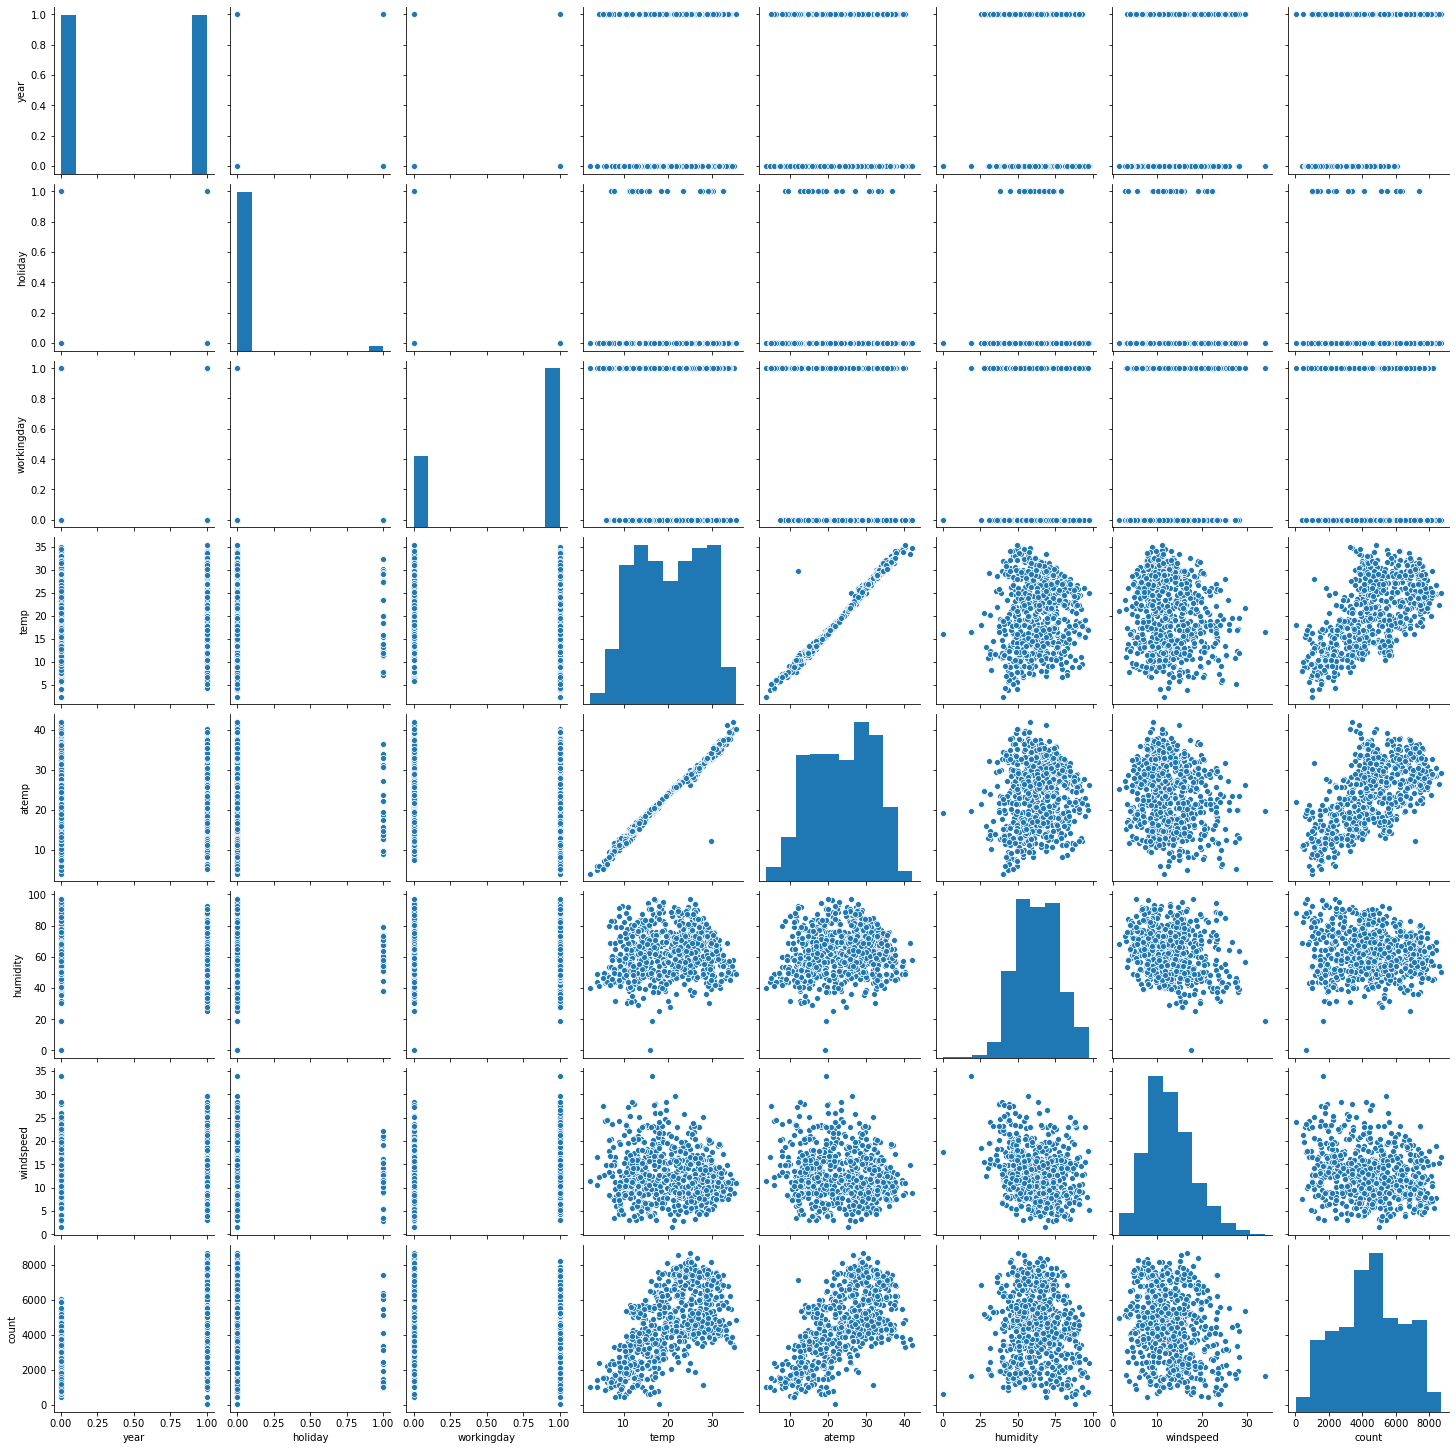

In [16]:
# PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES
sns.pairplot(data=bike)
plt.show()

#### From above graphs we can say that temp and atemp have a relationship.Lets check correlation in further analysis



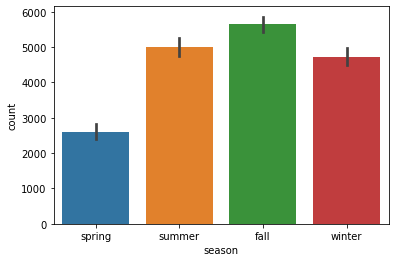

In [17]:
#Visualising categorical Variables to understand data better
sns.barplot(data=bike,x=bike['season'],y=bike['count'])
plt.show()

#### Bike Rentals are more during the Fall(Monsoon) season.

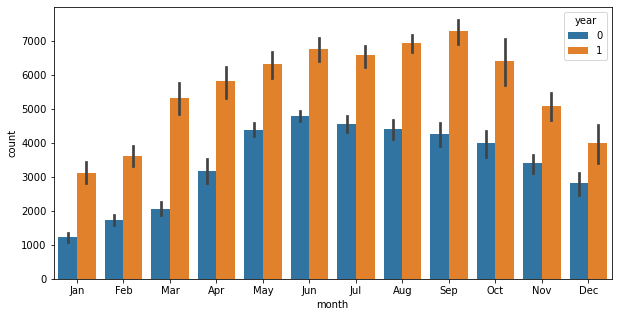

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=bike,x=bike['month'],y=bike['count'],hue='year')

#### 2019 has more rentals than 2018

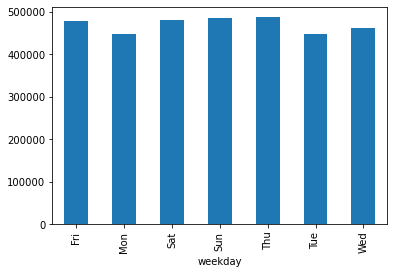

In [19]:
bike.groupby('weekday')['count'].sum().plot(kind='bar')

#### Bike Rentals are maximum on Sunday

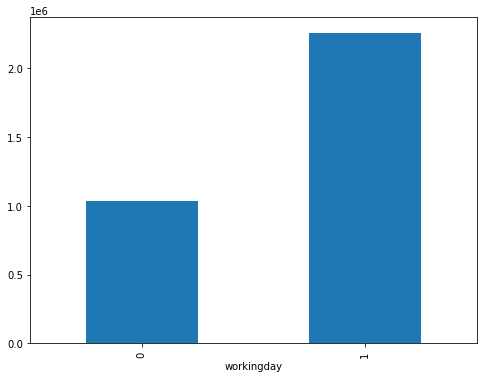

In [20]:
plt.figure(figsize=(8,6))
bike.groupby('workingday')['count'].sum().plot(kind='bar')

#### if day is neither weekend nor holiday is 1,
#### otherwise is 0

### Bikes seem to be rented more on working days

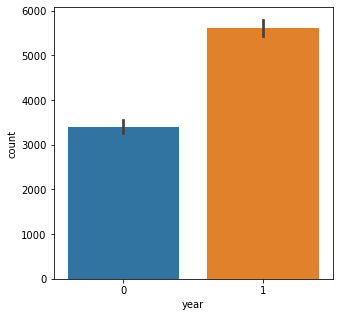

In [21]:
plt.figure(figsize=(5,5))
sns.barplot(data=bike,x='year',y='count')

#### {2018:0 ,2019:1}
#### Bike Rental popularity has increased in 2019 when compared to 2018

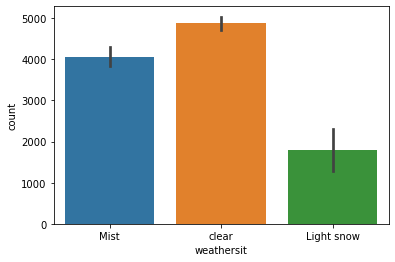

In [22]:
sns.barplot(data=bike,x='weathersit',y='count')

### weathersit
#### 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#### 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#### 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
####  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#### Bikes seem to be rented more in Partly cloudy weather.

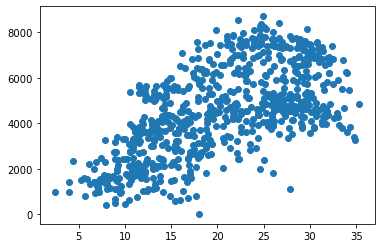

In [23]:
plt.scatter(data=bike,x='temp',y='count')

#### Bike Rentals are observed at higher temperatures

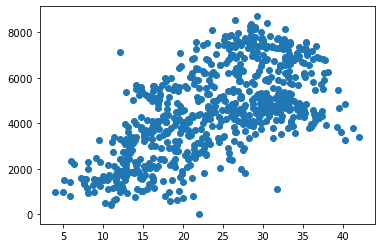

In [24]:
plt.scatter(data=bike,x='atemp',y='count')

#### Bike Rentals are observed at higher "feel-like" temperatures.

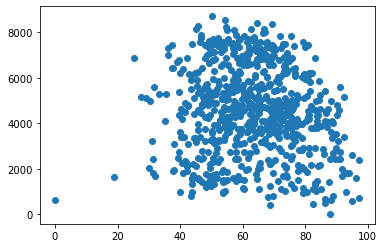

In [25]:
plt.scatter(data=bike,x='humidity',y='count')

#### Temperature being directly proportional to Humidity, Bike Rentals are making during high humidity.

### let check the correlation

In [26]:
bike.corr()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
year,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


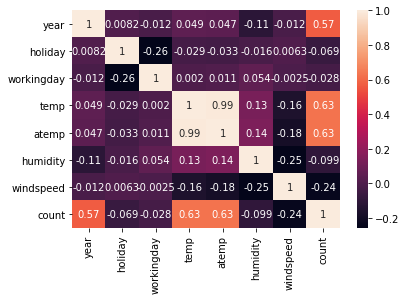

In [27]:
sns.heatmap(bike.corr(),annot=True)

In [28]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop atemp and consider temp to avoid multicollinearity
bike=bike.drop(['atemp'],axis=1)

In [29]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600


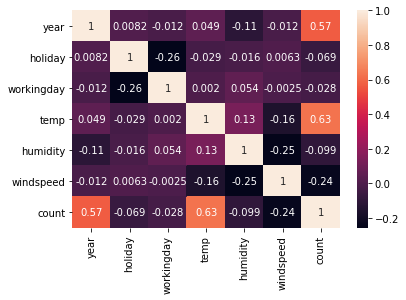

In [30]:
sns.heatmap(bike.corr(),annot=True)

##  Dealing With Categorical Variables

In [31]:
#Creating dummy variables
seasons=pd.get_dummies(bike['season'],drop_first=True)
months=pd.get_dummies(bike['month'],drop_first=True)
weekdays=pd.get_dummies(bike['weekday'],drop_first=True)
weather=pd.get_dummies(bike['weathersit'],drop_first=True)

In [32]:
bike=pd.concat([bike,seasons,months,weekdays,weather],axis=1)

In [33]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,clear
0,spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,spring,0,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
bike.shape

(730, 33)

In [35]:
#Deleting the orginal columns season,weathersit,weekday,month
bike=bike.drop(['season','month','weathersit','weekday'],axis=1)

In [36]:
bike.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,clear
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
bike.shape

(730, 29)

##  Splitting the Data into Training and Testing Sets

In [38]:

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
#Rescaling the Features
scaler = MinMaxScaler()

In [40]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'humidity', 'windspeed', 'count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('count')
X_train = df_train

In [42]:
from sklearn.feature_selection import RFE
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Mist', True, 1),
 ('clear', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Mist', 'clear'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [46]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   humidity    730 non-null    float64
 5   windspeed   730 non-null    float64
 6   count       730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Aug         730 non-null    uint8  
 11  Dec         730 non-null    uint8  
 12  Feb         730 non-null    uint8  
 13  Jan         730 non-null    uint8  
 14  Jul         730 non-null    uint8  
 15  Jun         730 non-null    uint8  
 16  Mar         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Nov         730 non-null    uint8  
 19  Oct         730 non-null    u

In [47]:
X_train_rfe = X_train[col]

In [48]:
# Building model using Statsmodel and Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
lm= sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.34e-189
Time:                        23:03:57   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.047      1.519      0.1

In [50]:
vif = pd.DataFrame()
X = X_train_rfe.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,26.36
2,temp,25.12
14,clear,15.69
13,Mist,9.25
5,spring,5.75
4,windspeed,4.67
7,winter,4.54
6,summer,3.28
0,year,2.10
11,Nov,1.89


In [51]:
#column humidity has a very high VIF so we drop it
X_train_new1 =X_train_rfe.drop('humidity', axis=1)
lm= sm.OLS(y_train,X_train_new1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.57e-186
Time:                        23:03:57   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0463      0.039     -1.184      0.2

In [52]:
vif = pd.DataFrame()
X = X_train_new1.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,clear,15.68
2,temp,14.00
12,Mist,8.77
3,windspeed,4.65
4,spring,4.40
6,winter,3.36
5,summer,2.76
0,year,2.08
10,Nov,1.87
8,Jan,1.74


In [53]:
#column clear has a very high VIF so we drop it
X_train_new2 =X_train_new1.drop('clear', axis=1)
lm= sm.OLS(y_train,X_train_new2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.08e-160
Time:                        23:03:58   Log-Likelihood:                 441.37
No. Observations:                 510   AIC:                            -854.7
Df Residuals:                     496   BIC:                            -795.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2198      0.036      6.054      0.0

In [54]:
#column Nov has a  high pvalue so we drop it
X_train_new3 =X_train_new2.drop('Nov', axis=1)
lm= sm.OLS(y_train,X_train_new3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     159.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.63e-161
Time:                        23:03:58   Log-Likelihood:                 440.69
No. Observations:                 510   AIC:                            -855.4
Df Residuals:                     497   BIC:                            -800.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2094      0.035      5.952      0.0

In [55]:
#column Dec has a  high pvalue so we drop it
X_train_new4 =X_train_new3.drop('Dec', axis=1)
lm= sm.OLS(y_train,X_train_new4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.01e-162
Time:                        23:03:58   Log-Likelihood:                 440.16
No. Observations:                 510   AIC:                            -856.3
Df Residuals:                     498   BIC:                            -805.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2010      0.034      5.879      0.0

In [56]:
#column Jan has a  high pvalue so we drop it
X_train_new5 =X_train_new4.drop('Jan', axis=1)
lm= sm.OLS(y_train,X_train_new5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.44e-163
Time:                        23:03:58   Log-Likelihood:                 438.78
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     499   BIC:                            -809.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1872      0.033      5.638      0.0

In [57]:
vif = pd.DataFrame()
X = X_train_new5.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.54
5,summer,2.21
4,spring,2.08
0,year,2.06
6,winter,1.76
7,Jul,1.58
9,Mist,1.52
8,Sep,1.33
1,holiday,1.04


In [58]:
#temp variable has high VIF, but when we drop temp column, our R-square is dropping. 
#To maintain the R-square dropping windspeed column
X_train_new6 =X_train_new5.drop('windspeed', axis=1)
lm= sm.OLS(y_train,X_train_new6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          7.34e-156
Time:                        23:03:59   Log-Likelihood:                 419.20
No. Observations:                 510   AIC:                            -818.4
Df Residuals:                     500   BIC:                            -776.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1266      0.033      3.838      0.0

#### Now we have all the variables with p-value less than 0.05

In [59]:
vif = pd.DataFrame()
X = X_train_new6.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.21
0,year,2.06
4,summer,1.92
6,Jul,1.58
5,winter,1.53
8,Mist,1.52
3,spring,1.39
7,Sep,1.33
1,holiday,1.04


#### All the variables have VIF less than 5 and it's perfect!

##  Residual Analysis of the train data

In [60]:
#Residual analysis

In [61]:
y_pred = lm.predict(X_train_new6)

Text(0.5, 0, 'Errors')

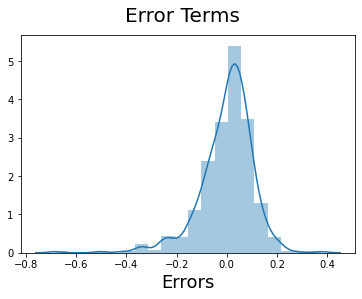

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## Making Predictions

In [63]:
num_vars = ['temp', 'humidity', 'windspeed', 'count']
df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [64]:
y_test = df_test.pop('count')
X_test = df_test

In [65]:
Xnew = X_train_new6.drop('const',axis=1)

In [66]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[Xnew.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [67]:
#Making predicitons
y_pred_test = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

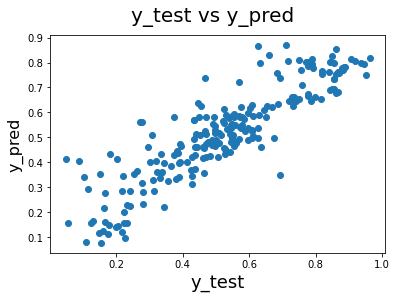

In [68]:
## Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [69]:
from sklearn.metrics import r2_score, adjusted_rand_score
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred_test)
r_squared


0.7759565106718698

In [70]:
#Calculate the adjusted r square for test
n=X_test.shape[0]
p=X_test.shape[1]
adjr2=1-(1-r_squared)*(n-1)/(n-p-1)
adjr2

0.7429395754024611

In [71]:
#Calculate the r square for train
r_squared = r2_score(y_train, y_pred)
r_squared


0.775280318272392

In [72]:
#Calculate the adjusted r square for train
n=X_train.shape[0]
p=X_train.shape[1]
adjr2=1-(1-r_squared)*(n-1)/(n-p-1)
adjr2

0.7621989230782693

# Final Result Comparison

#### Train R^2:0.77
#### Train Adjusted R^2:0.76
#### Test R^2:0.77
#### Test Adjusted R^2:0.74

In [73]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          7.34e-156
Time:                        23:04:02   Log-Likelihood:                 419.20
No. Observations:                 510   AIC:                            -818.4
Df Residuals:                     500   BIC:                            -776.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1266      0.033      3.838      0.0

## We can see that the equation for best fitted line is:
### count=0.1266+0.238*year-0.087*holiday+0.519*temp-0.070*spring+0.036*summer+0.074*winter-0.055*Jul+0.071*Sep-0.065*Mist

## We can see the demand for bikes depends mainly on below variables:
### Year,holiday,temp,spring,summer,winter,Jul,Sep,Mist

### Demand increases for year,temp,summer,winter,sep

### Demand decreases if it is holiday,spring,Jul,Mist


### Final recommendations for the company:
#### year,temp,summer,winter,sep